In [1]:
%load_ext autoreload

In [6]:
%autoreload 2
import siestah2o as h2o
import numpy as np 
import xcml
import siesta_utils.grid as siesta
from ase.io import read

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import ipyparallel as parallel
import time
client = parallel.Client(profile='default2')

In [5]:
loader = h2o.DescriptorGetter(client)

Clients operating : 128


In [8]:
coords = read('/gpfs/home/smdick/smdick/md_siesta_descr_test/md_siesta.traj', '-1').get_positions()

In [9]:
start = time.time()
feat = loader.get_features(coords)
print(time.time()- start)

32.33312487602234


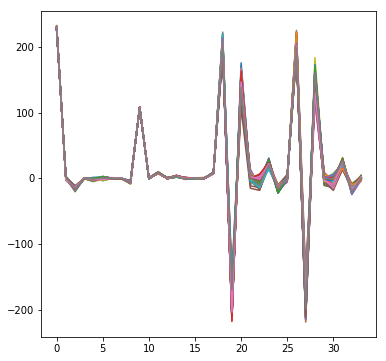

In [10]:
figsize(6,6)
plot(feat[0].reshape(-1,34).T);

In [13]:
siesta.get_data_bin('H2O.RHOXC');

In [14]:
basis = {'r_c_o': 1.0,'r_i_o': 0.05, 'r_i_h': 0.0, 'r_c_h' : 1.5,
             'n_rad_o' : 2,'n_rad_h' : 2, 'n_l_o' : 3, 'n_l_h' : 2, 'gamma_o': 20, 'gamma_h': 15}

In [15]:
decomp = xcml.full_decomposition(coords, siesta, basis)

In [19]:
np.allclose(decomp,feat[0])

True

In [ ]:
xcml.find_coords('')